### *Exploratory Data Analysis & Data Visualization*
---

### Importing Libraries

In [27]:
import numpy as np
import pandas as pd
from sklearn.impute import SimpleImputer
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
import matplotlib.pyplot as plt
import seaborn as sns

### Reading in Data

In [28]:
df = pd.read_csv('../datasets/mental-heath-in-tech-2016_20161114.csv')

### Dropping Columns

In [29]:
df.drop(df.columns[[0,1,2,9,14,15,16,17,18,19,20,21,22,30,35,36,37,38,39,42,43,44,45,46,47,48,49,50,51,53,54,57,58,59,60,61,62]], axis=1, inplace=True)

In [43]:
df.head()

Does your employer provide mental health benefits as part of healthcare coverage?  \
0                    Not eligible for coverage / N/A                                  
1                                                 No                                  
2                                                 No                                  
3                                                Yes                                  
4                                                Yes                                  

  Do you know the options for mental health care available under your employer-provided coverage?  \
0                                                 No                                                
1                                                Yes                                                
2                                                 No                                                
3                                                 No                                                
4                                                Yes                                                

  Has your employer ever formally discussed mental health (for example, as part of a wellness campaign or other official communication)?  \
0                                                 No                                                                                       
1                                                Yes                                                                                       
2                                                 No                                                                                       
3                                                 No                                                                                       
4                                                 No                                                                                       

  Does your employer offer resources to learn more about mental health concerns and options for seeking help?  \
0                                                 No                                                            
1                                                Yes                                                            
2                                                 No                                                            
3                                                 No                                                            
4                                                 No                                                            

  Is your anonymity protected if you choose to take advantage of mental health or substance abuse treatment resources provided by your employer?  \
0                                       I don't know                                                                                               
1                                                Yes                                                                                               
2                                       I don't know                                                                                               
3                                       I don't know                                                                                               
4                                                 No                                                                                               

  Do you think that discussing a mental health disorder with your employer would have negative consequences?  \
0                                                 No                                                           
1                                                 No                                                           
2                                              Maybe                                                           
3              

### Null Value Data Visualization

In [31]:
variableSummary = []
for var in df.columns:
    variableSummary.append({
        'Variable': var,
        'Type': df[var].dtype,
        'Count': df[var].count(),
        'UniqueValues':len(df[var].unique()),
        'Unique/Count Ratio':len(df[var].unique())/df[var].count(),
        'Count of NaN': df[var].isna().sum(),
        'Percentage NaN': df[var].isna().sum() *100 /len(df[var]),
    })
vs=pd.DataFrame(variableSummary)
vs=vs.sort_values(by='Percentage NaN',ascending=False)
vs

Variable     Type  Count  \
10  If yes, what percentage of your work time (tim...   object    204   
0   Is your primary role within your company relat...  float64    263   
2   Do you know the options for mental health care...   object   1013   
3   Has your employer ever formally discussed ment...   object   1146   
4   Does your employer offer resources to learn mo...   object   1146   
5   Is your anonymity protected if you choose to t...   object   1146   
6   Do you think that discussing a mental health d...   object   1146   
7   Do you think that discussing a physical health...   object   1146   
8   Would you feel comfortable discussing a mental...   object   1146   
9   Would you feel comfortable discussing a mental...   object   1146   
1   Does your employer provide mental health benef...   object   1146   
16  Was your anonymity protected if you chose to t...   object   1264   
20  Did you feel that your previous employers took...   object   1264   
19  Would you have been willing to discuss a menta...   object   1264   
18  Would you have been willing to discuss a menta...   object   1264   
17  Do you think that discussing a physical health...   object   1264   
13  Were you aware of the options for mental healt...   object   1264   
15  Did your previous employers provide resources ...   object   1264   
14  Did your previous employers ever formally disc...   object   1264   
12  Have your previous employers provided mental h...   object   1264   
25                               What is your gender?   object   1430   
11                    Do you have previous employers?    int64   1433   
21  Do you feel that being identified as a person ...   object   1433   
22  Do you think that team members/co-workers woul...   object   1433   
23  Have you ever sought treatment for a mental he...    int64   1433   
24                                  What is your age?    int64   1433   

    UniqueValues  Unique/Count Ratio  Count of NaN  Percentage NaN  
10             5            0.024510          1229       85.764131  
0              3            0.011407          1170       81.646895  
2              4            0.003949           420       29.309142  
3              4            0.003490           287       20.027913  
4              4            0.003490           287       20.027913  
5              4            0.003490           287       20.027913  
6              4            0.003490           287       20.027913  
7              4            0.003490           287       20.027913  
8              4            0.003490           287       20.027913  
9              4            0.003490           287       20.027913  
1              5            0.004363           287       20.027913  
16             5            0.003956           169       11.793440  
20             5            0.003956           169       11.793440  
19             5            0.003956           169       11.793440  
18             4            0.003165           169       11.793440  
17             4            0.003165           169       11.793440  
13             5            0.003956           169       11.793440  
15             4            0.003165           169       11.793440  
14             5            0.003956           169       11.793440  
12             5            0.003956           169       11.793440  
25            71            0.049650             3        0.209351  
11             2            0.001396             0        0.000000  
21             5            0.003489             0        0.000000  
22             5            0.003489             0        0.000000  
23             2            0.001396             0        0.000000  
24            53            0.036985             0        0.000000

''

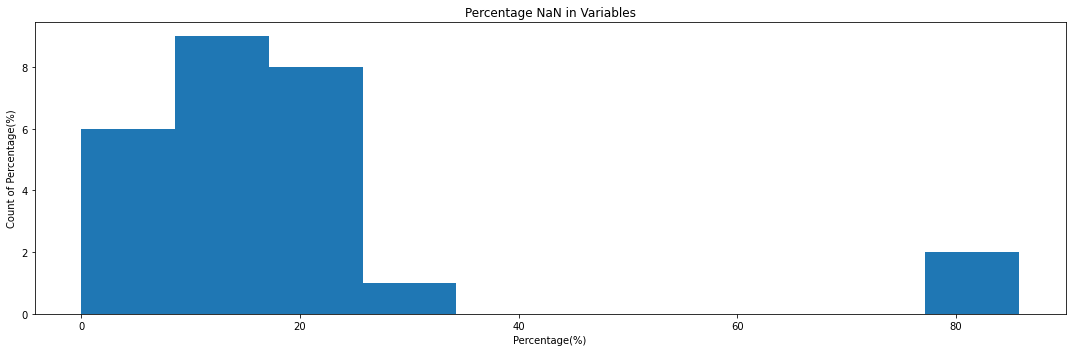

In [32]:
plt.figure(figsize=(15,5))
plt.hist(vs['Percentage NaN'])
plt.title('Percentage NaN in Variables')
plt.xlabel('Percentage(%)')
plt.ylabel('Count of Percentage(%)')

plt.tight_layout()
plt.savefig('../age_distribution.jpg');
;

### Dropping 50%+ Null Value Columns

In [33]:
df.dropna(axis=1,thresh=len(df.values)/2,inplace=True) 

### Simple Imputing for Null Values

In [34]:
imputer = SimpleImputer(missing_values=np.nan, strategy='most_frequent')
imputer.fit(df)
df= pd.DataFrame(data = imputer.transform(df), columns = df.columns)

### Filtering and More Cleaning

In [35]:
df["What is your gender?"] = df["What is your gender?"].str.lower().str.strip()
male = ['Male', 'male', 'M', 'm', 'Cis Male', 'man', 'ostensibly male, unsure what that really means', 'Mail', 'Make', 'male (cis)', 
        'cis male', 'maile', 'Malr', 'Cis Man', 'Mal', 'msle', 'male.', 'sex is male', 'malr', 'cis man', 'mail' ]
     
f = ['Female', 'female', 'F', 'f', 'Woman', 'Femake', 'Female (cis)', 'cis female', 'woman', 'femail', 
     'cis-female/femme', 'i identify as female.', 'cis-woman', 'cisgender female', 'female (props for making this a freeform field, though)', 
     'female/woman', 'female assigned at birth' ]

df["What is your gender?"] = df["What is your gender?"].replace(male, 'male')
df["What is your gender?"] = df["What is your gender?"].replace(f, 'female')

other = list(df["What is your gender?"].value_counts().index)[2:]
df["What is your gender?"] = df["What is your gender?"].replace(other, 'other')

mean_age = df[(df["What is your age?"] >= 18) | (df["What is your age?"] <= 75)]["What is your age?"].mean()
df["What is your age?"].replace(to_replace = df[(df["What is your age?"] < 18) | (df["What is your age?"] > 75)]["What is your age?"].tolist(), value = mean_age, inplace = True)

### EDA

In [36]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1433 entries, 0 to 1432
Data columns (total 24 columns):
 #   Column                                                                                                                                          Non-Null Count  Dtype  
---  ------                                                                                                                                          --------------  -----  
 0   Does your employer provide mental health benefits as part of healthcare coverage?                                                               1433 non-null   object 
 1   Do you know the options for mental health care available under your employer-provided coverage?                                                 1433 non-null   object 
 2   Has your employer ever formally discussed mental health (for example, as part of a wellness campaign or other official communication)?          1433 non-null   object 
 3   Does your employer offe

### Age Distribution

''

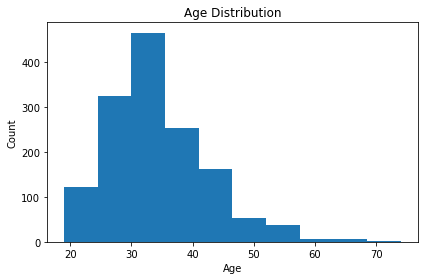

In [37]:
plt.hist(df['What is your age?'])
plt.title('Age Distribution')
plt.xlabel('Age')
plt.ylabel('Count')

plt.tight_layout()
plt.savefig('../age_distribution.jpg');
;

### Sought Treatment vs. Did not seek Treatment

In [38]:
df['Have you ever sought treatment for a mental health issue from a mental health professional?'].value_counts()

1    839
0    594
Name: Have you ever sought treatment for a mental health issue from a mental health professional?, dtype: int64

### Seeking Treatment

''

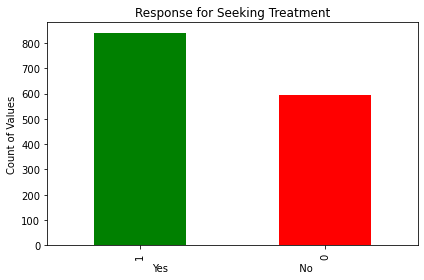

In [39]:
df['Have you ever sought treatment for a mental health issue from a mental health professional?'].value_counts().plot.bar(color=['green','red'])
plt.title('Response for Seeking Treatment')
plt.xlabel('Yes                                          No')
plt.ylabel('Count of Values')
plt.tight_layout()
plt.savefig('../seeking_treatment_response.jpg')
;

In [40]:
df['Does your employer provide mental health benefits as part of healthcare coverage?'].value_counts()


Yes                                818
I don't know                       319
No                                 213
Not eligible for coverage / N/A     83
Name: Does your employer provide mental health benefits as part of healthcare coverage?, dtype: int64

### Healthcare Knowledge

''

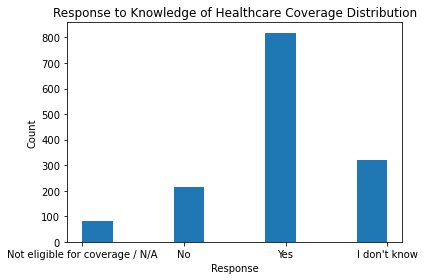

In [41]:
plt.hist(df['Does your employer provide mental health benefits as part of healthcare coverage?'])
plt.title('Response to Knowledge of Healthcare Coverage Distribution')
plt.xlabel('Response')
plt.ylabel('Count')

plt.tight_layout()
plt.savefig('../mental_health_coverage_distribution.jpg')
;

### Gender Count

In [42]:
df['What is your gender?'].value_counts()

male      1056
female     336
other       41
Name: What is your gender?, dtype: int64

### Top 10 questions

In [24]:
pd.DataFrame(gs.best_estimator_.feature_importances_, index=gs.best_estimator_.feature_names_in_, columns=['weights']).sort_values(by='weights', ascending=False).head(10)

weights
What is your age?                                   0.098172
What is your gender?_male                           0.076974
Were you aware of the options for mental health...  0.067696
Do you know the options for mental health care ...  0.038887
Do you feel that being identified as a person w...  0.027910
Did you feel that your previous employers took ...  0.025747
Does your employer provide mental health benefi...  0.024201
Do you know the options for mental health care ...  0.024174
Do you think that discussing a mental health di...  0.023423
Have your previous employers provided mental he...  0.019462